# Lang Graph


## Steps
* Make a state (its a intial component in which we add the information which flows in the graph)
* Make a node (it upgrades the values of states,it can be any python function,business logic or llm)
* make edges(used to connect nodes,controls flow of graph,)
### Graph Construction
Now, we build the graph from our components defined above.
The StateGraph class is the graph class that we can use.
First, we initialize a StateGraph with the State class we defined above.
Then, we add our nodes and edges.
We use the START Node, a special node that sends user input to the graph, to indicate where to start our graph.
The END Node is a special node that represents a terminal node.

Finally, we compile our graph to perform a few basic checks on the graph structure.
We can visualize the graph as a Mermaid diagram.

In [4]:
from typing_extensions import TypedDict
class LearningState(TypedDict):
    prompt:str
state1 : LearningState = LearningState(prompt="Hello Lang Graph")  
print(state1)
print(state1["prompt"])
print(state1["prompt"]+ " I am duaa")
print(type(state1))  

state2:LearningState= LearningState(prompt="Pakistan Zindabad")

{'prompt': 'Hello Lang Graph'}
Hello Lang Graph
Hello Lang Graph I am duaa
<class 'dict'>


In [24]:
def node1(state:LearningState) -> LearningState:
    print("--- Node 1 ---")      #return type
    #logic
    return {"prompt":state["prompt"] + " I am Duaa learning Lang Graph"}
def node2(state:LearningState) -> LearningState:
    print("--- Node 2 ---")
    return{"prompt":state["prompt"] + " I want to become an AI engineer"}
node2(state2)

--- Node 2 ---


{'prompt': 'Pakistan Zindabad I want to become an AI engineer'}

In [25]:
# Graph
from IPython.display import Image,display #preview graph
from langgraph.graph import StateGraph,START,END
from langgraph.graph.state import CompiledStateGraph

#build graph
builder : StateGraph = StateGraph(state_schema=LearningState)
print(builder)



In [26]:
#nodes
builder.add_node("work",node1)
builder.add_node("goal",node2)

#edges logic
builder.add_edge(START,"work")
builder.add_edge("work","goal")
builder.add_edge("goal",END)



Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'work': Node(id='work', name='work', data=work(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'goal': Node(id='goal', name='goal', data=goal(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='work', data=None, conditional=False), Edge(source='goal', target='__end__', data=None, conditional=False), Edge(source='work', target='goal', data=None, conditional=False)])
--- Node 1 ---
--- Node 2 ---
{'prompt': 'hi I am Duaa learning Lang Graph I want to become an AI engineer'}


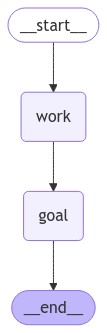

In [32]:
#add
graph1 : CompiledStateGraph = builder.compile()
print(graph1.get_graph())
print(graph1.invoke({"prompt":"hi"}))
display(Image(graph1.get_graph().draw_mermaid_png()))

In [1]:
#Make own graph
from IPython.display import Image,display #preview graph
from typing_extensions import TypedDict
from langgraph.graph import START,END,StateGraph
from langgraph.graph.state import CompiledStateGraph
class MyselfState (TypedDict):
    name:str
    age:int
    work:str
    goal:str

my_state:MyselfState=MyselfState(name="Duaa",age="20",work="Studying",goal="AI engineer")

def node_1(state:MyselfState)->MyselfState:
    return {"name":"Hi my name is " + state["name"] + "."}
def node_2(state:MyselfState)->MyselfState:
    return{"age":" My age is "+state["age"] + "."}
def node_3(state:MyselfState)->MyselfState:
    return{"work":" I am currently "+state["work"]}
def node_4(state:MyselfState)->MyselfState:
    return{"goal":"& my goal is to become " + state["goal"]}

graph_builder:StateGraph=StateGraph(state_schema=MyselfState)
graph_builder.add_node("name_define",node_1)
graph_builder.add_node("age_define",node_2)
graph_builder.add_node("work_define",node_3)
graph_builder.add_node("goal_define",node_4)

graph_builder.add_edge(START,"name_define")
graph_builder.add_edge("name_define","age_define")
graph_builder.add_edge("age_define","work_define")
graph_builder.add_edge("work_define","goal_define")
graph_builder.add_edge("goal_define",END)



{'name': 'Hi my name is Duaa.', 'age': ' My age is 20.', 'work': ' I am currently studying', 'goal': '& my goal is to become AI Engineer'}


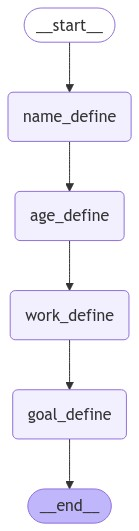

In [3]:
my_graph : CompiledStateGraph = graph_builder.compile()
print(my_graph.invoke({"name":"Duaa","age":"20","work":"studying","goal":"AI Engineer"}))
display(Image(my_graph.get_graph().draw_mermaid_png()))